In [3]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install scipy

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel

%matplotlib inline

In [8]:
df = pd.read_csv('//content/NYC311data.csv', on_bad_lines='skip')

<ipython-input-8-096b53b2ec4f>:1: DtypeWarning: Columns (8,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('//content/NYC311data.csv', on_bad_lines='skip')


In [9]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [10]:
print(df.shape)

(33654, 53)


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33654 entries, 0 to 33653
Data columns (total 53 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unique Key                      33654 non-null  int64  
 1   Created Date                    33654 non-null  object 
 2   Closed Date                     33453 non-null  object 
 3   Agency                          33654 non-null  object 
 4   Agency Name                     33654 non-null  object 
 5   Complaint Type                  33654 non-null  object 
 6   Descriptor                      33175 non-null  object 
 7   Location Type                   33654 non-null  object 
 8   Incident Zip                    33425 non-null  object 
 9   Incident Address                29775 non-null  object 
 10  Street Name                     29774 non-null  object 
 11  Cross Street 1                  29263 non-null  object 
 12  Cross Street 2                  

In [29]:
# convert string colmns into lowercase letters

def convert_lower(df):
  df = df.applymap(lambda s:s.lower() if type(s) == str else s)
  return df


# drop empty columns

def drop_empty_columns(df):
  na_col_count = df.isna().sum().where(lambda x:x>0).dropna()
  columns_to_drop = []

  for column, count in na_col_count.items():
    if (count/8275 >= 0.85):
      columns_to_drop.append(column)
  df.drop(columns_to_drop, axis=1, inplace=True)
  return df


# drop irrelevant columns

def drop_irrelevant_columns(df):
  cols = ['Status', 'School Name', 'School Number', 'School Region', 'School Code', 'School Phone Number', 'School Address', 'School City', 'School State', 'School Zip', 'School Not Found']

  df.drop(cols, axis=1, inplace=True)
  return df

In [30]:
# data cleaning

df = convert_lower(df)
df = drop_empty_columns(df)
df = drop_irrelevant_columns(df)


df.isna().sum().where(lambda x:x>0).dropna()

<ipython-input-29-54ccbd30595a>:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda s:s.lower() if type(s) == str else s)


,0
Closed Date,201.0
Descriptor,479.0
Incident Zip,229.0
Incident Address,3879.0
Street Name,3880.0
Cross Street 1,4391.0
Cross Street 2,4441.0
Address Type,251.0
City,231.0
Facility Type,200.0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33654 entries, 0 to 33653
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unique Key                      33654 non-null  int64  
 1   Created Date                    33654 non-null  object 
 2   Closed Date                     33453 non-null  object 
 3   Agency                          33654 non-null  object 
 4   Agency Name                     33654 non-null  object 
 5   Complaint Type                  33654 non-null  object 
 6   Descriptor                      33175 non-null  object 
 7   Location Type                   33654 non-null  object 
 8   Incident Zip                    33425 non-null  object 
 9   Incident Address                29775 non-null  object 
 10  Street Name                     29774 non-null  object 
 11  Cross Street 1                  29263 non-null  object 
 12  Cross Street 2                  

In [33]:
# drop the rows with an empty value under the column 'Closed Date' and 'Resolution Action Updated Date', then drop it.

df = df[~(df['Closed Date'].isna() & df['Resolution Action Updated Date'].isna())]

# merge both of the rows

df.loc[df['Closed Date'].isna(), 'Closed Date'] = df[df['Closed Date'].isna()]['Resolution Action Updated Date']

df.loc[df['Resolution Action Updated Date'].isna(), 'Resolution Action Updated Date'] = df[df['Resolution Action Updated Date'].isna()]['Closed Date']

df.loc[df['Due Date'].isna(), 'Due Date'] = df[df['Due Date'].isna()]['Closed Date']


In [40]:
# filling the null values with the highest occuring value, i.e., the mode

city = df.City.mode()[0]
zipcode = df.loc[df.City == city, 'Incident Zip'].mode()[0]
latitude = df.loc[df['Incident Zip'] == zipcode, 'Latitude'].mode()[0]
longitude = df.loc[df['Incident Zip'] == zipcode, 'Longitude'].mode()[0]

df.loc[df.City.isna(), 'Incident Zip'] = zipcode
df.loc[df.City.isna(), 'City'] = city
df.loc[(df.City == city) & (df.Latitude.isna()==True), 'Latitude'] = latitude
df.loc[(df.City == city) & (df.Longitude.isna()==True), 'Longitude'] = longitude

In [41]:
df.isna().sum().where(lambda x:x>0).dropna()

,0
Descriptor,477.0
Incident Address,3877.0
Street Name,3878.0
Cross Street 1,4242.0
Cross Street 2,4250.0
Address Type,63.0
Facility Type,4.0
Resolution Description,2.0
Community Board,2.0
Borough,3.0


In [42]:
df.dropna(inplace=True)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28788 entries, 0 to 33652
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unique Key                      28788 non-null  int64  
 1   Created Date                    28788 non-null  object 
 2   Closed Date                     28788 non-null  object 
 3   Agency                          28788 non-null  object 
 4   Agency Name                     28788 non-null  object 
 5   Complaint Type                  28788 non-null  object 
 6   Descriptor                      28788 non-null  object 
 7   Location Type                   28788 non-null  object 
 8   Incident Zip                    28788 non-null  object 
 9   Incident Address                28788 non-null  object 
 10  Street Name                     28788 non-null  object 
 11  Cross Street 1                  28788 non-null  object 
 12  Cross Street 2                  28788

In [48]:
# Convert 'Closed Date' and 'Created Date' to datetime objects
df['Closed Date'] = pd.to_datetime(df['Closed Date'])
df['Created Date'] = pd.to_datetime(df['Created Date'])

# Calculate the time difference in hours
df['Request Closing Time(in hours)'] = (df['Closed Date'] - df['Created Date']).dt.total_seconds() / 3600

<ipython-input-48-756932708055>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Closed Date'] = pd.to_datetime(df['Closed Date'])
<ipython-input-48-756932708055>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Created Date'] = pd.to_datetime(df['Created Date'])


In [49]:
df.loc[:,'Request Closing Time(in hours)'] = (df['Closed Date'] - df['Created Date']).dt.total_seconds()

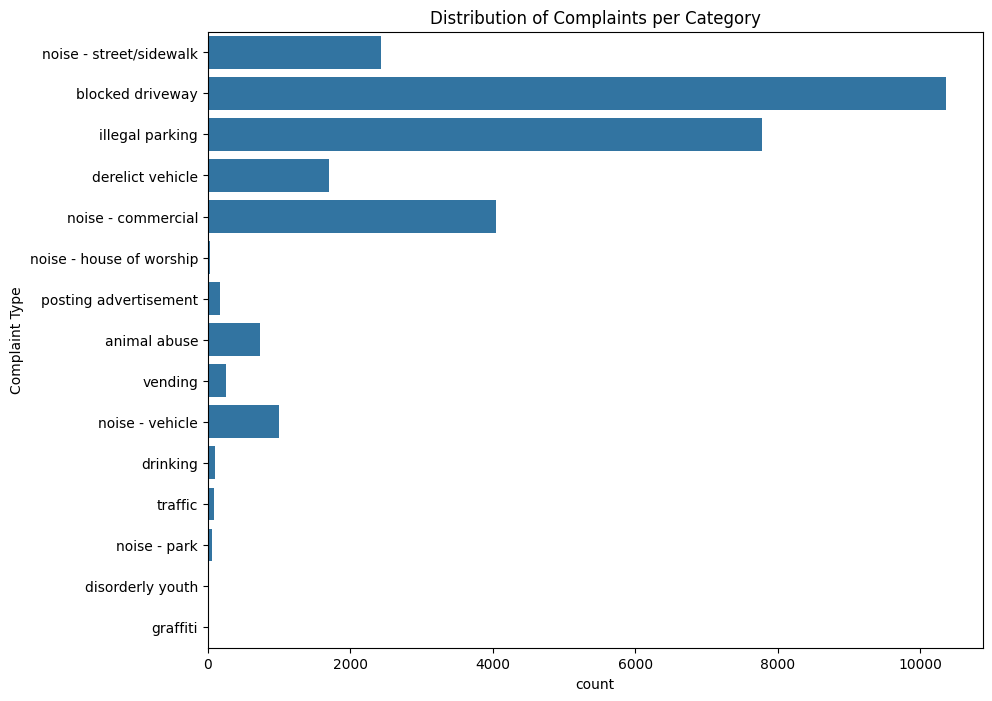

In [52]:
# total complaints per category

plt.figure(figsize=(10,8))
plt.title("Distribution of Complaints per Category")

sns.countplot(y='Complaint Type', data=df)
plt.show()

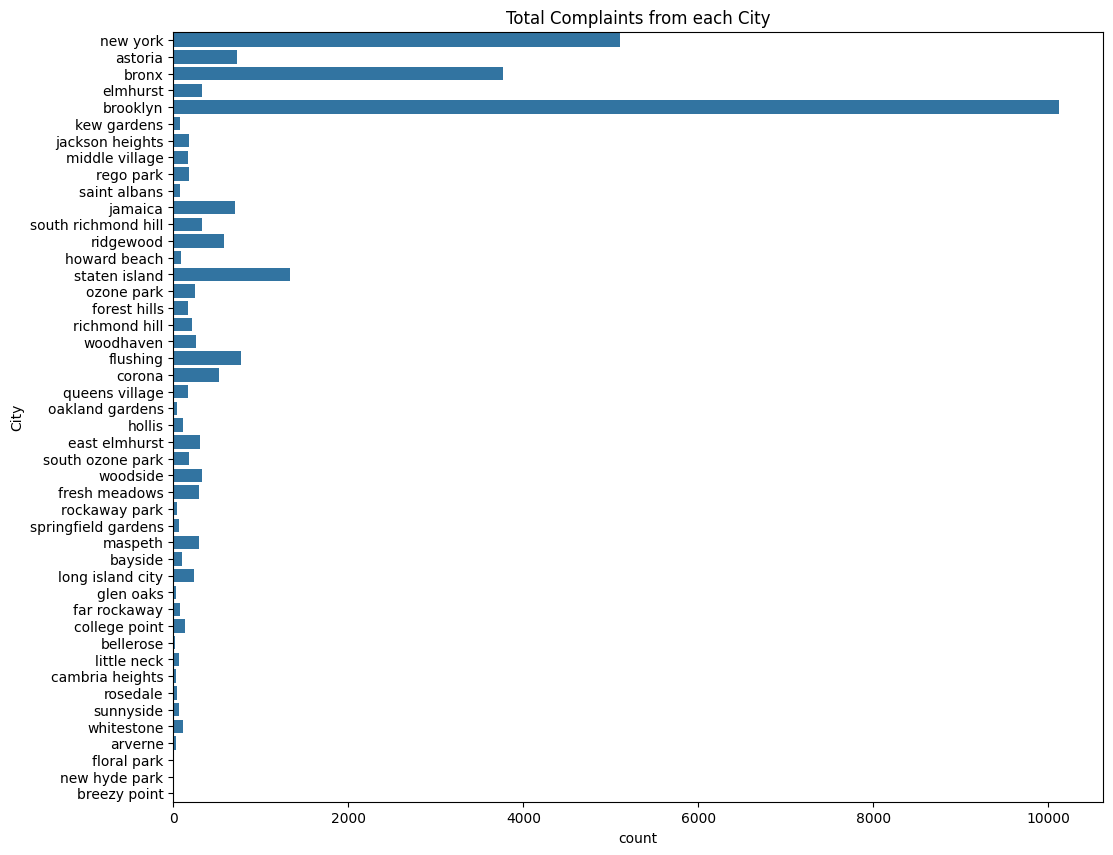

In [54]:
# total complaints from the city area

plt.figure(figsize=(12,10))
plt.title("Total Complaints from each City")

sns.countplot(y='City', data=df)
plt.show()

In [56]:
top5cities = df['City'].value_counts().head(5).index.to_list()
dstop5 = df[df.City.isin(top5cities)]

# complaints from city area(typewise)
df1 = pd.crosstab(dstop5['City'],dstop5['Complaint Type'])

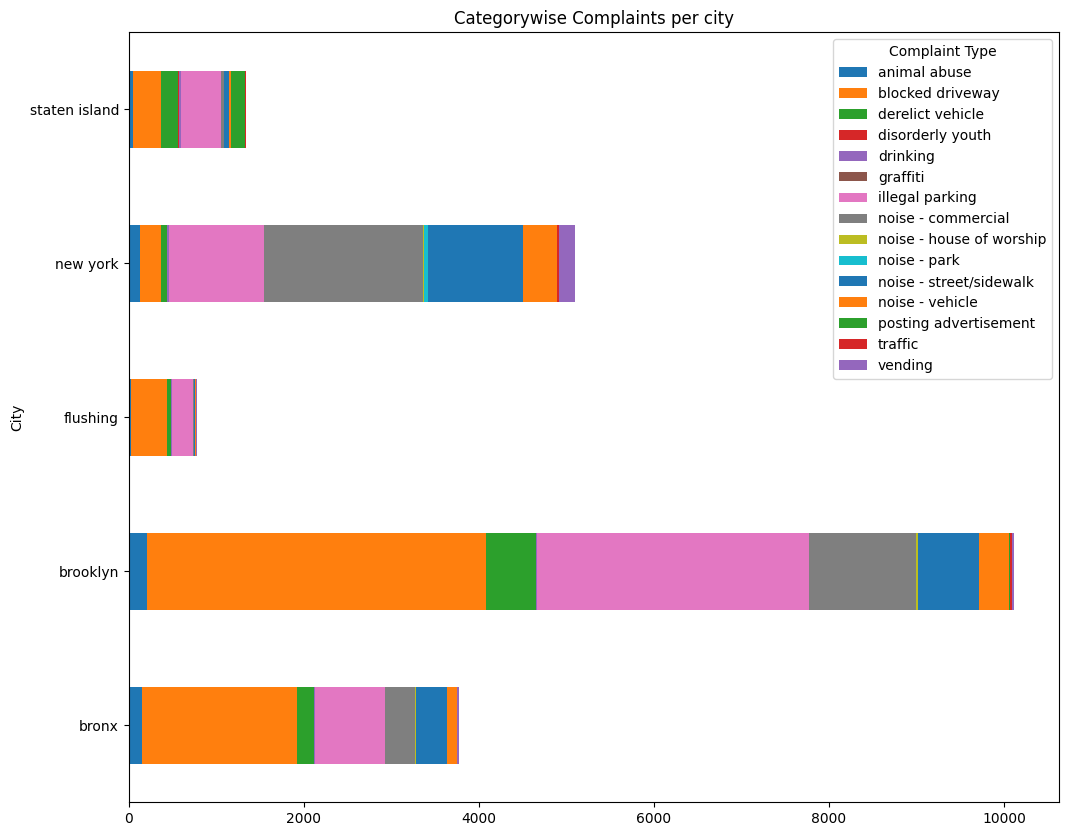

In [57]:
# complaints from city area(typewise

df1.plot(kind='barh',stacked=True,figsize=(12,10))
plt.title('Categorywise Complaints per city')
plt.show()

In [62]:
# new_ds = ds.dr
complaintTypes = df['Complaint Type'].unique()

for i in range(len(complaintTypes)):
    exec("c{} = df.loc[(df['Complaint Type'] == '{}'),'Request Closing Time(in hours)']".format(i+1,complaintTypes[i]))

    print(len(complaintTypes))

fscore, pvalue = stats.f_oneway(c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15)
print(fscore, pvalue)

15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
27.13347988455998 7.029589451130905e-72


In [63]:
#Chi square test: Complaint Type(CAT), Location(CAT)
ctabDF = pd.crosstab(df['Complaint Type'],df['City'])

In [64]:
stat, p, dof, expected = chi2_contingency(ctabDF)
print('Chi-Square Statistic Value: ',stat)
print('p value: ',p)
print('degrees of freedom: ',dof)

Chi-Square Statistic Value:  12998.052731943197
p value:  0.0
degrees of freedom:  630
